In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import shap
import os
from tqdm import tqdm
from src.model import algorithm
from src.utils import transform_

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor

# Preparing Dataset

In [68]:
df = pd.read_csv(r'C:\Users\daniel.riandy\Desktop\Daniel\___\Computer Vision Specialist\ComputerVision\notebooks\Assignment\01 - Weekly Assignment 1 - Boston House Pricing\data\boston_housing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
for col in df.columns:
    if col != 'chas' and col != 'medv':
        df[col] = transform_(data = df, column= col)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,-5.064036,1.8,0.837248,0,-0.619897,1.883275,0.085021,1.408545,0.000000,5.690359,1765.084757,3.9690,2.231591,24.0
1,-3.600502,0.0,1.955860,0,-0.757153,1.859574,0.124504,1.602836,0.693147,5.488938,21503.134392,3.9690,3.023243,21.6
2,-3.601235,0.0,1.955860,0,-0.757153,1.971996,0.074664,1.602836,0.693147,5.488938,21503.134392,3.9283,2.007486,34.7
3,-3.430523,0.0,0.779325,0,-0.780886,1.945624,0.041953,1.802073,1.098612,5.402677,52889.176249,3.9463,1.714643,33.4
4,-2.672924,0.0,0.779325,0,-0.780886,1.966693,0.058753,1.802073,1.098612,5.402677,52889.176249,3.9690,2.308679,36.2


# Modeling


Result:
    MAE Train = 3.9944419242096436
    MAE Test = 3.7052797376114834

    R2 Train = 0.6749596081287219
    R2 Test = 0.6454971066263588
        


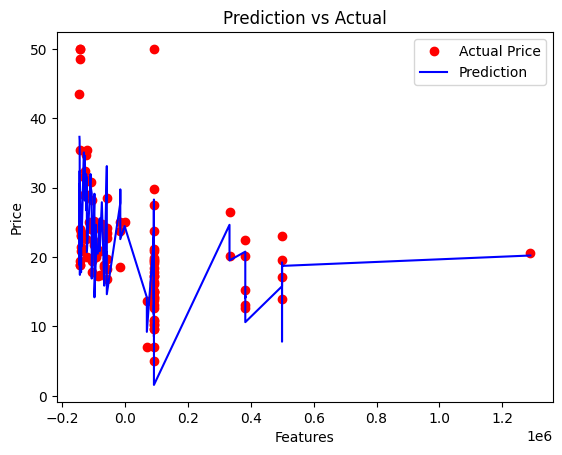

LinearRegression()

In [5]:
X = df.drop(columns = 'medv')
y = df['medv']

Linreg = algorithm(LinearRegression())
Linreg.evaluate_(X,y, scaling = False)



Result:
    MAE Train = 1.767648397084757
    MAE Test = 2.179157930219359

    R2 Train = 0.9362291123218744
    R2 Test = 0.8750566108359792
        


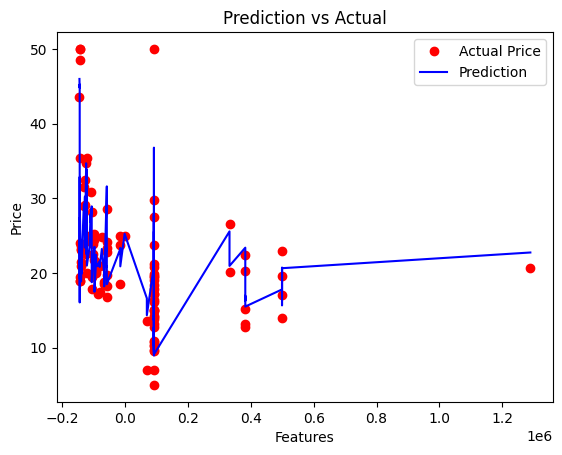

In [5]:
X = df.drop(columns = 'medv')
y = df['medv']

rf = algorithm(RandomForestRegressor(random_state=42,
                                    max_depth=5,
                                    n_estimators=1000,
                                    max_features=10))
rf = rf.evaluate_(X,y, scaling = False, SaveArtifacts = True)


# Model Interpretation

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
                                            X, y, test_size=.2,
                                            random_state=42)
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

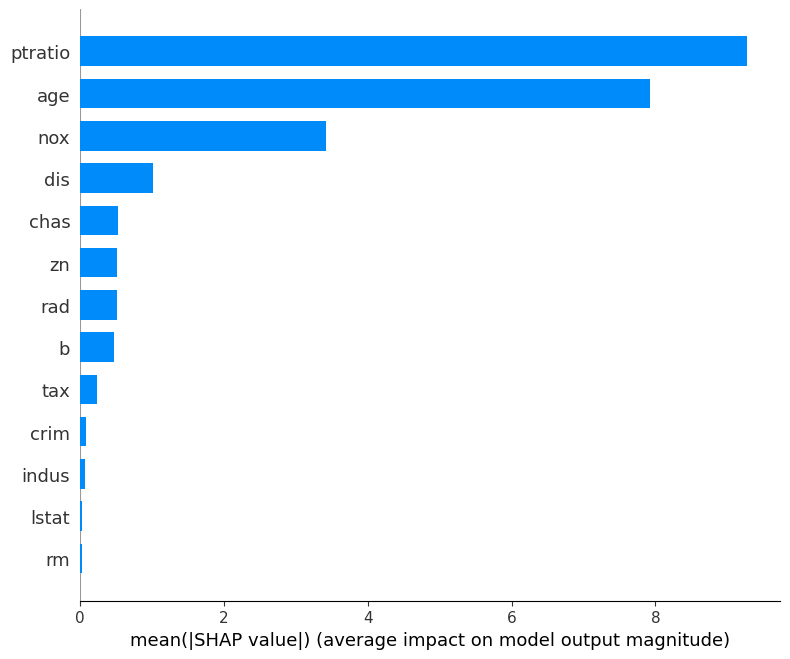

In [9]:
shap.summary_plot(shap_values, X_test, 
                  feature_names=X_test.columns, plot_type="bar")

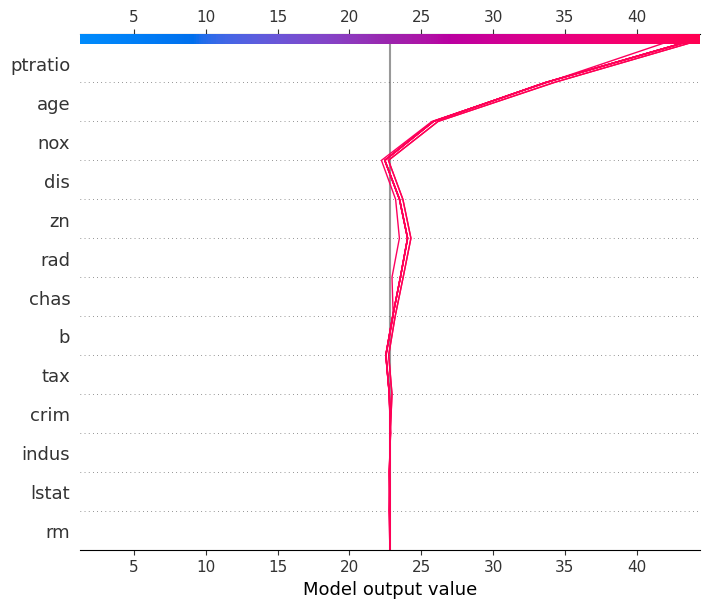

In [12]:
shap.decision_plot(explainer.expected_value, 
                   shap_values[0:10], 
                   feature_names = list(X_test.columns))

In [6]:
import pickle
model = pickle.load(open(r'./Artifacts/model.bin', "rb"))
features = pickle.load(open(r'./Artifacts/features.bin', "rb"))
vectorizer = pickle.load(open(r'./Artifacts/vectorizer.bin', "rb"))

In [15]:
h = pd.DataFrame(df.loc[0].drop('medv').values.reshape(1,-1)).to_dict(orient = 'records')
model.predict(vectorizer.transform(h))

array([37.37612496])

In [22]:
h = pd.DataFrame(df.loc[0].drop('medv').values.reshape(1,-1))
model.predict(h)

array([43.00058151])

In [16]:
df.loc[0].medv

24.0

In [18]:
df.loc[0].drop('medv').values

array([-5.06403607e+00,  1.80000000e+00,  8.37247525e-01,  0.00000000e+00,
       -6.19896719e-01,  1.88327458e+00,  8.50208000e-02,  1.40854497e+00,
        0.00000000e+00,  5.69035945e+00,  1.76508476e+03,  3.96900000e+00,
        2.23159136e+00])

In [21]:
import numpy as np
np.array([1,2,3,4])

array([1, 2, 3, 4])

In [69]:
        temp = df.corr()['medv'].drop('medv')
        hehe = pd.DataFrame()
        hehe['cols'] = temp.index
        hehe['corr'] = temp.values
        hehe['corr abs'] = abs(temp.values)
        hehe = hehe.sort_values(by = 'corr abs', ascending = False).reset_index(drop = True)
        corr_ = hehe.query(f"cols == 'crim'")['corr'].values[0]
        idx_ = hehe.query(f"cols == 'crim'")['corr'].index[0]

In [70]:
df.corr().medv

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
b          0.333461
lstat     -0.737663
medv       1.000000
Name: medv, dtype: float64

In [64]:
corr_

-0.4543019512212509

In [65]:
hehe.query(f"cols == 'crim'")['corr']

4   -0.454302
Name: corr, dtype: float64